In [4]:
import calendar
import os

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn import preprocessing

In [9]:
housing_df = pd.read_csv("./datasets/dmba/BostonHousing.csv")
housing_df = housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
housing_df.columns = [s.replace(" ", "_").strip().lower() for s in housing_df.columns]
housing_df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,16.59,18.4,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,6.47,33.4,1
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,15.17,11.7,0
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384,20.9,14.09,20.4,0


In [18]:
amtrak_df = pd.read_csv("./datasets/dmba/Amtrak.csv")
amtrak_df.columns = [s.strip().lower() for s in amtrak_df.columns]
amtrak_df["date"] = pd.to_datetime(amtrak_df.month, format="%d/%m/%Y")
ridership_ts = pd.Series(amtrak_df.ridership.values, index=amtrak_df.date)
ridership_ts

date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

## Plotting with Pandas

Text(0, 0.5, 'Ridership (in 000s)')

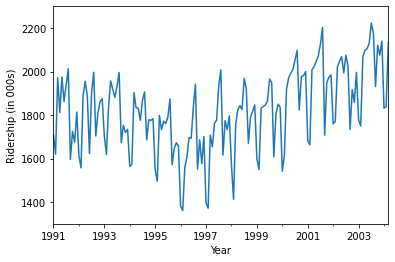

In [21]:
# Line graph.
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")

<AxesSubplot:xlabel='lstat', ylabel='medv'>

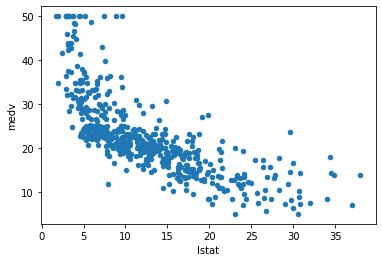

In [22]:
# Scatter plot with axes anmes
housing_df.plot.scatter(x="lstat", y="medv", legend=False)

Text(0, 0.5, 'Avg. MEDV')

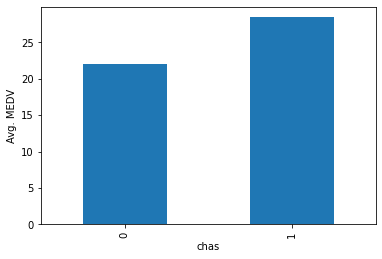

In [23]:
# Barchart of "chas" vs mean "medv"
ax = housing_df.groupby("chas").mean().medv.plot(kind="bar")
ax.set_ylabel("Avg. MEDV")

Text(0, 0.5, 'cat medv')

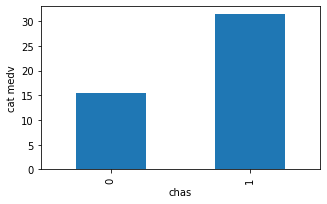

In [24]:
# Barchart of "chas" vs "cat_medv"
data_for_plot = housing_df.groupby("chas").mean()["cat_medv"] * 100
ax = data_for_plot.plot(kind="bar", figsize=[5, 3])
ax.set_ylabel("cat medv")

## Plotting with Matplotlib

Text(0, 0.5, 'Ridership (in 000s)')

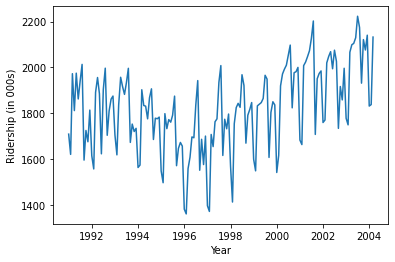

In [25]:
# Line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")

Text(0, 0.5, 'MEDV')

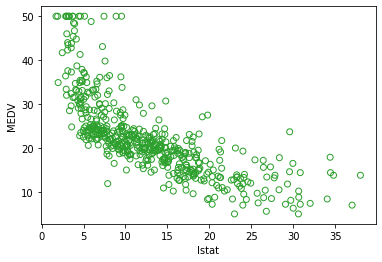

In [27]:
## Scatterplot

plt.scatter(housing_df.lstat, housing_df.medv, color="C2", facecolor="none")
plt.xlabel("lstat")
plt.ylabel("MEDV")

Text(0, 0.5, 'Avg. MEDV')

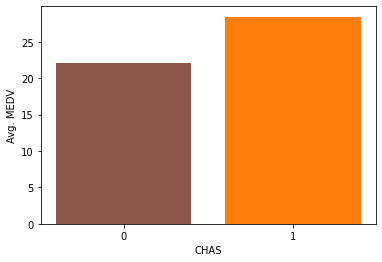

In [31]:
# Barchart of "CHAS" vs mean "MEDV"
data_for_plot = housing_df.groupby("chas").mean().medv
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel("CHAS")
ax.set_ylabel("Avg. MEDV")

Text(0, 0.5, 'cat_medv')

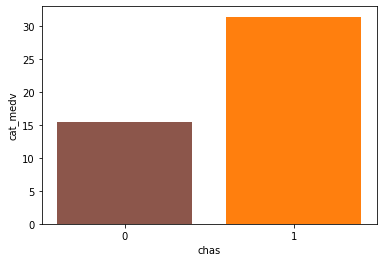

In [32]:
# Barchart of CHAS vs CAT MEDV
data_for_plot = housing_df.groupby("chas").mean()["cat_medv"] * 100
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel("chas")
ax.set_ylabel("cat_medv")

Text(0, 0.5, 'count')

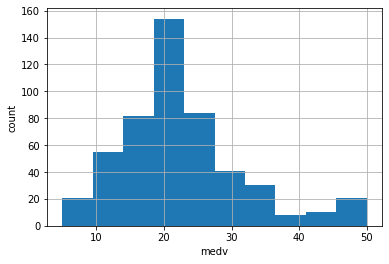

In [33]:
# Histogram of MDV
ax = housing_df.medv.hist()
ax.set_xlabel("medv")
ax.set_ylabel("count")

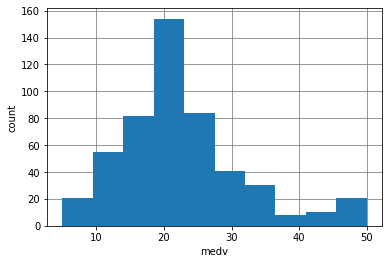

In [36]:
# Alternative plot with matplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.medv)
ax.set_axisbelow(True)
ax.grid(which="major", color="grey", linestyle="-")
ax.set_xlabel("medv")
ax.set_ylabel("count")
plt.show()

Text(0.5, 1.0, '')

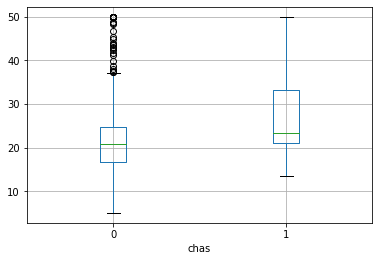

In [40]:
# Boxplot of "medv" for different values of "chas"
ax = housing_df.boxplot(column="medv", by="chas")
plt.suptitle("")  # Suppress the title
plt.title("")

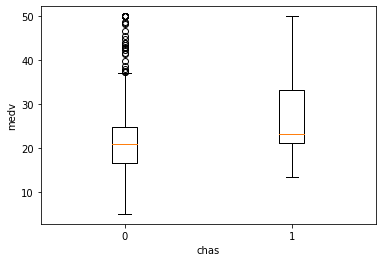

In [41]:
# Alternative plot with matplotlib
data_for_plot = [
    list(housing_df[housing_df.chas == 0].medv),
    list(housing_df[housing_df.chas == 1].medv),
]
fig, ax = plt.subplots()
ax.boxplot(data_for_plot)
ax.set_xticks([1, 2], minor=False)
ax.set_xticklabels([0, 1])
ax.set_xlabel("chas")
ax.set_ylabel("medv")
plt.show()

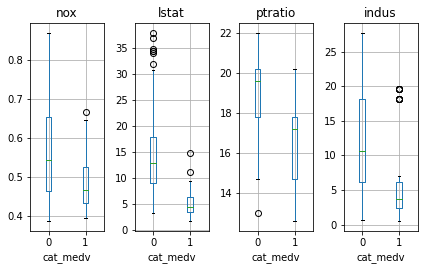

In [42]:
# side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column="nox", by="cat_medv", ax=axes[0])
housing_df.boxplot(column="lstat", by="cat_medv", ax=axes[1])
housing_df.boxplot(column="ptratio", by="cat_medv", ax=axes[2])
housing_df.boxplot(column="indus", by="cat_medv", ax=axes[3])
for ax in axes:
    ax.set_xlabel("cat_medv")
plt.suptitle("")
plt.tight_layout()

## Heatmap: visualizing correlations and missing values

<AxesSubplot:>

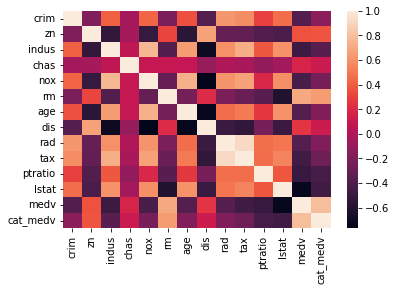

In [44]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot:>

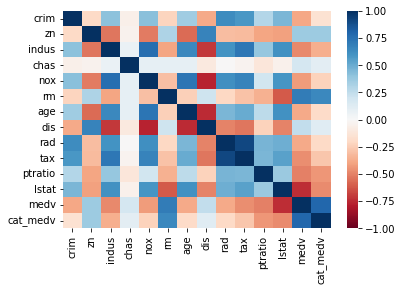

In [45]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmin=-1,
    vmax=1,
    cmap="RdBu",
)

<AxesSubplot:>

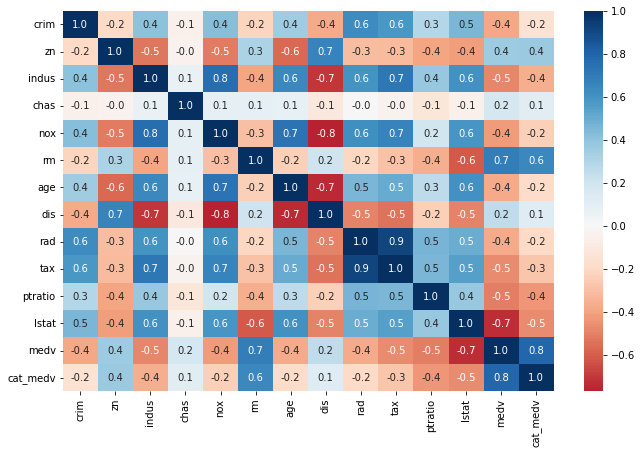

In [46]:
# Include the information aboutvalues (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [48]:
df = pd.read_csv("./datasets/dmba/NYPD_Motor_Vehicle_Collisions_1000.csv").sort_values(
    ["DATE"]
)
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
376,01/01/2014,16:16,MANHATTAN,10030.0,40.817846,-73.941844,"(40.8178464, -73.9418441)",7 AVENUE,WEST 139 STREET,NaN,...,NaN,NaN,NaN,NaN,67960,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
69,01/01/2018,11:00,BRONX,10458.0,40.861700,-73.891390,"(40.8617, -73.89139)",WEBSTER AVENUE,EAST FORDHAM ROAD,NaN,...,NaN,NaN,NaN,NaN,3821610,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
510,01/02/2013,12:07,STATEN ISLAND,10314.0,40.580618,-74.152529,"(40.5806177, -74.1525287)",FOREST HILL ROAD,RICHMOND HILL ROAD,NaN,...,Unspecified,NaN,NaN,NaN,295943,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
944,01/03/2014,19:30,STATEN ISLAND,10306.0,40.573786,-74.106423,"(40.5737857, -74.1064233)",HYLAN BOULEVARD,BRYANT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,300599,AMBULANCE,UNKNOWN,NaN,NaN,NaN
444,01/03/2017,11:44,NaN,NaN,40.721140,-73.942825,"(40.72114, -73.942825)",NORTH HENRY STREET,MEEKER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3591243,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,12/31/2015,15:25,QUEENS,11385.0,40.713333,-73.913038,"(40.7133332, -73.9130382)",NURGE AVENUE,METROPOLITAN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3363187,OTHER,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
171,12/31/2016,5:05,NaN,NaN,40.865166,-73.840500,"(40.865166, -73.8405)",ALLERTON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3590864,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
435,12/31/2017,4:09,BROOKLYN,11234.0,40.607594,-73.920044,"(40.607594, -73.920044)",NaN,NaN,2590 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,3821367,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
6,12/31/2017,3:35,NaN,NaN,40.846090,-73.944756,"(40.84609, -73.944756)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,3819338,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [49]:
# Given a dataframe, create a copy of the array that is 0 if a field contains a value and 1 for NaN
na_info = np.zeros(df.shape)
na_info[df.isna().values] = 1
na_info = pd.DataFrame(na_info, columns=df.columns)
na_info

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


[]

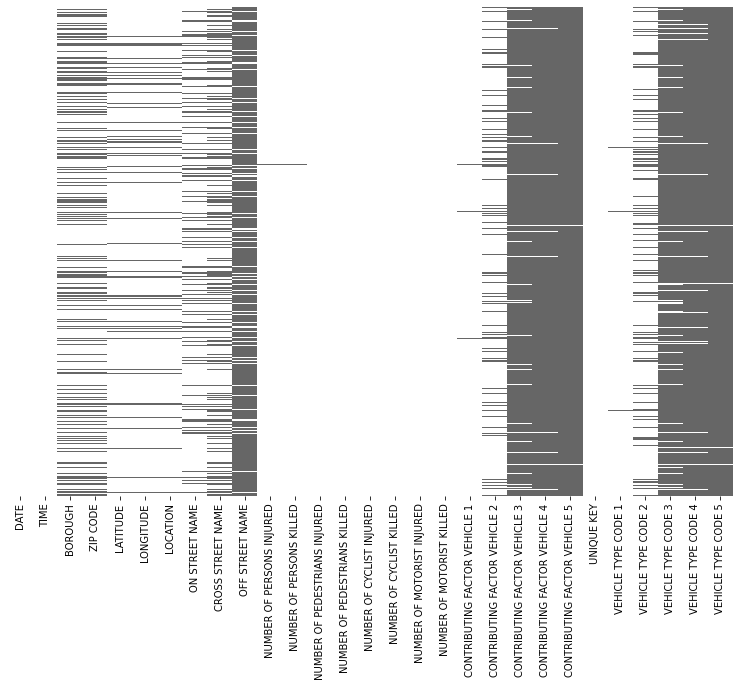

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(na_info, vmin=0, vmax=1, cmap=["white", "#666666"], cbar=False, ax=ax)
ax.set_yticks([])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

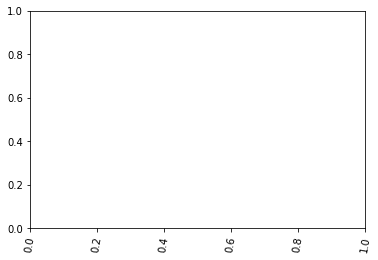

In [51]:
# Draw frame around figuire
rect = plt.Rectangle(
    (0, 0),
    na_info.shape[1],
    na_info.shape[0],
    linewidth=1,
    edgecolor="lightgrey",
    facecolor="none",
)
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)